In [4]:
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import time

In [51]:
# After watching the news about Robb Elementry school shooting incident, even though the criminal died I wondered what is the most harsh punishment for the criminals?
# I wanted to see what people think about death penalty. 
# Do people think death penalty is the right method for criminals with the worst crimes?

# Scrapping comments from the video 'Is the Death Penalty Ever Moral?'


In [52]:
# Scrapping comments from controversial Youtube video about death penalty
# comment 갯수를 제한하거나 comment 갯수가 더 적은걸로 바꿔야될듯!
browser = webdriver.Chrome('./chromedriver')
url = 'https://www.youtube.com/watch?v=8dnVZibrV6g'
browser.get(url)

/var/folders/zc/1dftl_rj0b55snyh5w747lv80000gn/T/ipykernel_3376/2364005499.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('./chromedriver')


In [53]:
# Scroll down the page to see all the comments
while True:
    scroll_height = 2000
    document_height_before = browser.execute_script('return document.documentElement.scrollHeight')
    browser.execute_script(f'window.scrollTo(0, {document_height_before + scroll_height});')
    time.sleep(2.0)
    document_height_after = browser.execute_script('return document.documentElement.scrollHeight')
    if document_height_after == document_height_before:
        break  

In [54]:
# Scrapping comments
selector = '#content'
comms = browser.find_elements_by_css_selector(selector)

/var/folders/zc/1dftl_rj0b55snyh5w747lv80000gn/T/ipykernel_3376/4039777507.py:3: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  comms = browser.find_elements_by_css_selector(selector)


In [72]:
train_df2 = train_df.copy()

In [55]:
commments_lst = [comment.text for comment in comms]

In [56]:
train_df = pd.DataFrame({'comment': commments_lst})

In [65]:
train_df.tail(10)

,comment,upper_count
1680,"Death penalty is more humane, than life senten...",0
1681,Why not just let the victim decide with the co...,0
1682,"Why can’t we go back in the olden days, where ...",0
1683,,0
1684,,0
1685,,0
1686,,0
1687,,0
1688,,0
1689,,0


In [67]:
# 끝에 7개 empty cell 제거
train_df = train_df[train_df['comment'] ]

In [68]:
train_df

,comment,upper_count
1,L vs KIRA in the comment section,2
3,I was all for the death penalty until someone ...,1
4,"""It is virtually impossible to execute an inno...",0
5,"The question shouldn't be: ""Do some people des...",0
6,Some crimes are too evil for judgement on Eart...,0
...,...,...
1678,most opposed to cap punishment will quickly ch...,0
1679,It's like algebra. Whatever happens to one sid...,0
1680,"Death penalty is more humane, than life senten...",0
1681,Why not just let the victim decide with the co...,0


In [62]:
# drop the first row since it is not a comment from the user
train_df.drop([0], axis=0, inplace=True)

In [63]:
# Counting the uppercase words
# uppercase words are often used to express anger or negativity
train_df['upper_count'] = train_df['comment'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [69]:
# Preprocessing the data 
# remove rows with null values
train_df.dropna(inplace = True)

/Users/junhoeum/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [70]:
train_df

,comment,upper_count
1,L vs KIRA in the comment section,2
3,I was all for the death penalty until someone ...,1
4,"""It is virtually impossible to execute an inno...",0
5,"The question shouldn't be: ""Do some people des...",0
6,Some crimes are too evil for judgement on Eart...,0
...,...,...
1678,most opposed to cap punishment will quickly ch...,0
1679,It's like algebra. Whatever happens to one sid...,0
1680,"Death penalty is more humane, than life senten...",0
1681,Why not just let the victim decide with the co...,0


In [71]:
# remove duplicates
train_df.drop_duplicates(subset = ['comment'], inplace = True)

/Users/junhoeum/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [42]:
# Remove punctuations
train_df['comment'] = train_df['comment'].str.replace('[^\w\s]', '')

/var/folders/zc/1dftl_rj0b55snyh5w747lv80000gn/T/ipykernel_6022/2713402024.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['comment'] = train_df['comment'].str.replace('[^\w\s]', '')


In [73]:
# Remove stopwords
import nltk
from nltk.corpus import stopwords
stop = stopwords.words()

train_df['comment'] = train_df['comment'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

/var/folders/zc/1dftl_rj0b55snyh5w747lv80000gn/T/ipykernel_3376/1305531077.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['comment'] = train_df['comment'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))


In [75]:
# Frequent word removal
freq = pd.Series(' '.join(train_df['comment']).split(' ')).value_counts()[:7]
train_df['comment'] = train_df['comment'].apply(lambda x: ' '.join(x for x in x.split(' ') if x not in freq))

/var/folders/zc/1dftl_rj0b55snyh5w747lv80000gn/T/ipykernel_3376/1480804511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['comment'] = train_df['comment'].apply(lambda x: ' '.join(x for x in x.split(' ') if x not in freq))


In [76]:
# Rare word removal
rare = pd.Series(' '.join(train_df['comment']).split(' ')).value_counts()[-15:]
train_df['comment'] = train_df['comment'].apply(lambda x: ' '.join(x for x in x.split(' ') if x not in rare))

/var/folders/zc/1dftl_rj0b55snyh5w747lv80000gn/T/ipykernel_3376/3601288409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['comment'] = train_df['comment'].apply(lambda x: ' '.join(x for x in x.split(' ') if x not in rare))


In [77]:
# Lowercase the comments
train_df['comment'] = train_df['comment'].apply(lambda x: x.lower())

/var/folders/zc/1dftl_rj0b55snyh5w747lv80000gn/T/ipykernel_3376/2308675076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['comment'] = train_df['comment'].apply(lambda x: x.lower())


In [80]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# Using lemmatizer to lemmatize all comments in the 'comment' column

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/junhoeum/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [81]:
lemmatizer = WordNetLemmatizer()

def lemmatizer_pos(sentence):
    sentence = sentence.split()
    words_and_tags = nltk.pos_tag(sentence)
    lemmatized_lst = []
    for word, tag in words_and_tags:
        lemma = lemmatizer.lemmatize(word, pos = get_wordnet_pos(tag))
        lemmatized_lst.append(lemma)
    return ' '.join(lemmatized_lst)

lemmatizer_pos('Hi I has been junho')

'Hi I have be junho'

In [82]:
train_df['lemmatized'] = train_df['comment'].apply(lambda x: lemmatizer_pos(x))

/var/folders/zc/1dftl_rj0b55snyh5w747lv80000gn/T/ipykernel_3376/690323866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['lemmatized'] = train_df['comment'].apply(lambda x: lemmatizer_pos(x))


In [83]:
train_df

,comment,upper_count,lemmatized
1,l vs kira comment section,2,l v kira comment section
3,"someone asked question ""do trust government ne...",1,"someone ask question ""do trust government neve..."
4,"""it virtually impossible execute innocent pers...",0,"""it virtually impossible execute innocent pers..."
5,"question be: ""do deserve die?"", be: ""should go...",0,"question be: ""do deserve die?"", be: ""should go..."
6,some crimes evil judgement earth. send next re...,0,some crime evil judgement earth. send next rec...
...,...,...,...
1678,opposed cap punishment quickly change opinion ...,0,opposed cap punishment quickly change opinion ...
1679,it's like algebra. whatever happens side happe...,0,it's like algebra. whatever happen side happen...
1680,"death humane, sentence. what better - suffer s...",0,"death humane, sentence. what good - suffer sec..."
1681,why let victim decide court providing options...,0,why let victim decide court provide options...


In [87]:
from textblob import TextBlob

In [88]:
# Labeling the polarity score -> positive(1), negative(0)
def polarity_score(sentence):
    res = TextBlob(sentence)
    return res.sentiment.polarity
train_df['polarity_score'] = train_df['comment'].apply(lambda x: polarity_score(x))
train_df['label'] = train_df['polarity_score'].apply(lambda x: 1 if x > 0 else 0)

/var/folders/zc/1dftl_rj0b55snyh5w747lv80000gn/T/ipykernel_3376/3324267846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['polarity_score'] = train_df['comment'].apply(lambda x: polarity_score(x))
/var/folders/zc/1dftl_rj0b55snyh5w747lv80000gn/T/ipykernel_3376/3324267846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['label'] = train_df['polarity_score'].apply(lambda x: 1 if x > 0 else 0)


In [89]:
train_df

,comment,upper_count,lemmatized,polarity_score,label
1,l vs kira comment section,2,l v kira comment section,0.000000,0
3,"someone asked question ""do trust government ne...",1,"someone ask question ""do trust government neve...",0.000000,0
4,"""it virtually impossible execute innocent pers...",0,"""it virtually impossible execute innocent pers...",0.144444,1
5,"question be: ""do deserve die?"", be: ""should go...",0,"question be: ""do deserve die?"", be: ""should go...",0.500000,1
6,some crimes evil judgement earth. send next re...,0,some crime evil judgement earth. send next rec...,-0.166667,0
...,...,...,...,...,...
1678,opposed cap punishment quickly change opinion ...,0,opposed cap punishment quickly change opinion ...,0.261111,1
1679,it's like algebra. whatever happens side happe...,0,it's like algebra. whatever happen side happen...,-0.125000,0
1680,"death humane, sentence. what better - suffer s...",0,"death humane, sentence. what good - suffer sec...",-0.050000,0
1681,why let victim decide court providing options...,0,why let victim decide court provide options...,-0.075000,0


<AxesSubplot:>

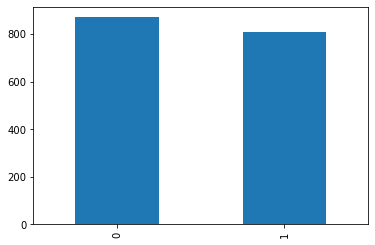

In [90]:
# Visualize the distribution of 0 and 1 in labels column
train_df['label'].value_counts().plot(kind = 'bar')
# More negative comments

In [43]:
train_df.loc[train_df['comment'] == 'l vs kira comment section'].index[0]

0

In [98]:
# write dataframe into csv file
train_df.to_csv('Ever_Moral?.csv')




In [64]:
# Get TF-IDF
# TF  = (Frequency of a word in the document)/(Total words in the document)
# IDF = Log((Total number of docs)/(Number of docs containing the word))

In [17]:
import nltk
import numpy as np
from nltk import word_tokenize

In [7]:
train_df = pd.read_csv('./data/Ever_Moral?.csv')

In [12]:
train_df['comment'] = train_df['comment'].astype('str')

In [13]:
idx = 0
word2idx = {}
tokenized_docs = []
for doc in train_df['comment']:
    words = word_tokenize(doc)
    doc_as_int = []
    for word in words:
        if word not in word2idx:
            word2idx[word] = idx
            idx += 1
        doc_as_int.append(word2idx[word])
    tokenized_docs.append(doc_as_int)

In [14]:
N = len(train_df['comment'])
V = len(word2idx)

In [18]:
tf = np.zeros((N,V))

In [19]:
for i, doc_as_int in enumerate(tokenized_docs):
    for j in doc_as_int:
        tf[i,j] += 1


In [21]:
document_freq = np.sum(tf >0, axis = 0)
idf = np.log(N/document_freq)
tf_idf = tf * idf
np.random.seed(1234)

In [22]:
idx2word = {}
for key, val in word2idx.items():
    idx2word[val] = key

In [30]:
i = np.random.choice(N)
row = train_df.iloc[i]
print('Comment: ', row['comment'].split('\n',1)[0])
print('Top 5 terms: ')

scores = tf_idf[i]
indices = (-scores).argsort()
for j in indices[:5]:
    print(idx2word[j])

Comment:  why can’t go back olden days, prisoners thrown arena’s sausages around neck’s, big lion waiting them?!?
Top 5 terms: 
lion
olden
neck
sausages
arena


In [47]:
train_df.loc[train_df['comment'] == 'l vs kira comment section'].index[0]

def tf_idf_top(i):
    i = train_df.loc[train_df['comment'] == i].index[0]
    row = train_df.iloc[i]
    scores = tf_idf[i]
    indices = (-scores).argsort()
    tf_words = []
    for j in indices[:5]:
        tf_words.append(idx2word[j])
    return tf_words

train_df['tf_idf'] = train_df['comment'].apply(lambda x: tf_idf_top(x))    
    

In [48]:
train_df

,Unnamed: 0,comment,upper_count,lemmatized,polarity_score,label,tf_idf
0,1,l vs kira comment section,2,l v kira comment section,0.000000,0,"[l, kira, section, vs, comment]"
1,3,"someone asked question ""do trust government ne...",1,"someone ask question ""do trust government neve...",0.000000,0,"[asked, trust, mistake, question, do]"
2,4,"""it virtually impossible execute innocent pers...",0,"""it virtually impossible execute innocent pers...",0.144444,1,"[virtually, leg, lmao, word, '']"
3,5,"question be: ""do deserve die?"", be: ""should go...",0,"question be: ""do deserve die?"", be: ""should go...",0.500000,1,"[be, die, ``, subjective, understanding]"
4,6,some crimes evil judgement earth. send next re...,0,some crime evil judgement earth. send next rec...,-0.166667,0,"[judgement, greater, next, send, earth]"
...,...,...,...,...,...,...,...
1675,1678,opposed cap punishment quickly change opinion ...,0,opposed cap punishment quickly change opinion ...,0.261111,1,"[cap, hypocrisy, quickly, friends, opposed]"
1676,1679,it's like algebra. whatever happens side happe...,0,it's like algebra. whatever happen side happen...,-0.125000,0,"[algebra, adds, other, happens, whatever]"
1677,1680,"death humane, sentence. what better - suffer s...",0,"death humane, sentence. what good - suffer sec...",-0.050000,0,"[years, seconds, physical, crazy, humane]"
1678,1681,why let victim decide court providing options...,0,why let victim decide court provide options...,-0.075000,0,"[providing, options, court, why, decide]"


In [ ]:
# Make TF-IDF column to get top 5 words from every comment
train_df['TF-IDF'] = 

In [ ]:
# Scroll down the page to see all the comments
while True:
    scroll_height = 2000
    document_height_before = browser.execute_script('return document.documentElement.scrollHeight')
    browser.execute_script(f'window.scrollTo(0, {document_height_before + scroll_height});')
    time.sleep(2.0)
    document_height_after = browser.execute_script('return document.documentElement.scrollHeight')
    if document_height_after == document_height_before:
        pass  